<a href="https://colab.research.google.com/github/RonySherif/AI-Assisted-Patient-Intake-System/blob/main/Hypertension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hypertension_dataset.csv to hypertension_dataset.csv


In [6]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("hypertension_dataset.csv")

print(" Data Loaded Successfully!")
print(df.head())

df = df.dropna()


X = df.drop('Hypertension', axis=1)
y = df['Hypertension']


y = y.replace({'Low': 0, 'High': 1})


X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Class Imbalance Ratio: {ratio:.2f}")

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=ratio,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("\n Training XGBoost model...")
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n XGBoost Accuracy: {acc * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



✅ Data Loaded Successfully!
     Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   73  18.2          173          156            60   
3     Canada   60  20.3          183          122            94   
4     France   73  21.8          296           91            97   

  Smoking_Status  Alcohol_Intake Physical_Activity_Level Family_History  ...  \
0          Never            27.9                     Low            Yes  ...   
1          Never            27.5                    High            Yes  ...   
2        Current             1.8                    High            Yes  ...   
3          Never            11.6                Moderate            Yes  ...   
4          Never            29.1                Moderate            Yes  ...   

  Sleep_Duration  Heart_Rate  LDL  HDL  Triglycerides  Glucose  Gender  \
0            6

/tmp/ipython-input-1204595897.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Low': 0, 'High': 1})


Class Imbalance Ratio: 0.39

🚀 Training XGBoost model...

✅ XGBoost Accuracy: 53.88%

Confusion Matrix:
[[ 4039  5850]
 [10290 14818]]

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.41      0.33      9889
           1       0.72      0.59      0.65     25108

    accuracy                           0.54     34997
   macro avg       0.50      0.50      0.49     34997
weighted avg       0.59      0.54      0.56     34997



Training Logistic Regression...
Logistic Regression Accuracy: 71.74%

Training Decision Tree...
Decision Tree Accuracy: 58.69%

Training Random Forest...
Random Forest Accuracy: 71.74%


📊 Model Comparison Results:
                 Model  Accuracy
0  Logistic Regression  0.717433
1        Decision Tree  0.586850
2        Random Forest  0.717433


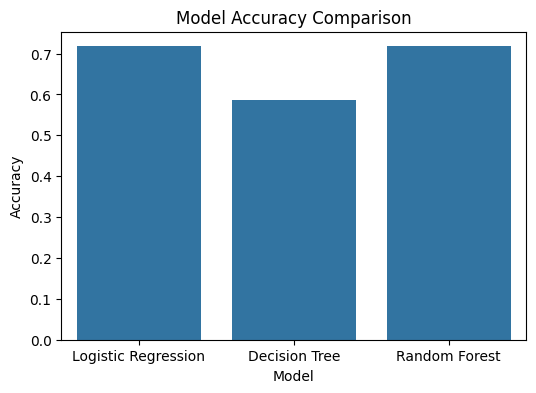

In [7]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),

}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc*100:.2f}%\n")



results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\n Model Comparison Results:")
print(results_df)

plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()


In [8]:

!pip install xgboost --quiet

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n XGBoost Accuracy: {acc * 100:.2f}%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training XGBoost model...

✅ XGBoost Accuracy: 71.74%

Confusion Matrix:
[[    1  9888]
 [    2 25106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      9889
           1       0.72      1.00      0.84     25108

    accuracy                           0.72     34997
   macro avg       0.53      0.50      0.42     34997
weighted avg       0.61      0.72      0.60     34997



In [5]:

!pip install imbalanced-learn --quiet
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, f1_score

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

xgb_model_balanced = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

print("\n Training XGBoost model after SMOTE balancing...")
xgb_model_balanced.fit(X_train_res, y_train_res)
y_pred_balanced = xgb_model_balanced.predict(X_test_res)

acc_before = accuracy_score(y_test, y_pred)
recall_before = recall_score(y_test, y_pred)
f1_before = f1_score(y_test, y_pred)

acc_after = accuracy_score(y_test_res, y_pred_balanced)
recall_after = recall_score(y_test_res, y_pred_balanced)
f1_after = f1_score(y_test_res, y_pred_balanced)

comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "F1 Score"],
    "Before SMOTE": [acc_before, recall_before, f1_before],
    "After SMOTE": [acc_after, recall_after, f1_after]
})
print("\n Comparison Before vs After SMOTE:")
print(comparison)



🚀 Training XGBoost model after SMOTE balancing...

📊 Comparison Before vs After SMOTE:
     Metric  Before SMOTE  After SMOTE
0  Accuracy      0.717404     0.793950
1    Recall      0.999920     1.000000
2  F1 Score      0.835446     0.828216
